# **Tugas Data Mining (Naive Bayes dan KNN)**

Nama : Wanda Eka Putri

NIM : 4101422019

Prodi : Pendidikan Matematika

**Soal Praktik**



1. Cari dataset klasifikasi dari sumber terbuka seperti Kaggle, UCI Machine Learning Repository,
atau lainnya. Kriteria dataset:

  • Terdiri dari minimal 100 baris data

  • Memiliki minimal 1 kolom target (klasifikasi) dan 4 fitur

   Penyelesaian:
   
   Data Stroke : https://drive.google.com/file/d/1TjKRcbvfBJU8Z75XKY9ej1PhzvXYnxln/view?usp=sharing
   
   Sumber: Kaggle.com


2. Lakukan Preprocessing data

   Penyelesaian:

# **PREPROCESSING**



Menampilkan data dari dataset stroke_csv

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
#pemanggilan data
data = pd.read_csv('/content/drive/MyDrive/stroke_data.csv')

In [78]:
data.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


In [79]:
data.tail(15)

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
40895,0.0,65.0,0,0,1,3,0,102.21,36.3,0,0
40896,0.0,22.0,0,1,1,2,1,77.30,33.4,0,0
40897,0.0,54.0,0,0,0,1,0,97.97,24.5,0,0
40898,0.0,40.0,0,0,1,4,1,81.33,28.9,0,0
40899,1.0,27.0,0,0,1,4,1,196.61,23.0,0,0
40900,1.0,30.0,0,0,1,3,1,219.92,33.5,1,0
40901,1.0,19.0,0,0,1,2,0,79.16,34.8,1,0
40902,0.0,64.0,0,0,1,3,1,99.68,17.6,1,0
40903,1.0,30.0,0,0,1,3,1,79.55,21.1,1,0
40904,1.0,60.0,0,0,1,4,0,87.86,29.0,1,0


In [80]:
#melihat statistika deskriptif
data.describe()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40907.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000
mean,0.555162,51.327255,0.213835,0.127719,0.821340,3.461134,0.514886,122.075901,30.406355,0.488609,0.500122
std,0.496954,21.623969,0.410017,0.333781,0.383072,0.780919,0.499784,57.561531,6.835072,0.499876,0.500006
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.590000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


Menampilkan informasi tipe data setiap kolom dan mengecek apakah ada missing values

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


Berdasarkan hasil output di atas, dapat disimpulkan bahwa dataset stroke memiliki total: 11 kolom, dengan jumlah maksimal baris untuk setiap kolomnya sebanyak: 40910 baris. Akan tetapi terdapat satu kolom yang memiliki jumlah baris < 40910, hal ini menunjukkan bahwa dalam data tersebut terdapat missing values, maka akan dilakukan proses identifikasi lebih lanjut.

## **Deteksi Missing Value dalam Dataset Stroke**



In [82]:
data.isnull()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
40905,False,False,False,False,False,False,False,False,False,False,False
40906,False,False,False,False,False,False,False,False,False,False,False
40907,False,False,False,False,False,False,False,False,False,False,False
40908,False,False,False,False,False,False,False,False,False,False,False


Jumlah missing values di setiap kolom dalam dataset stroke dapat dilihat sebagai berikut.

In [83]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
sex,3
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


Berdasarkan hasil output summarize tersebut, diperoleh bahwa kolom yang mengandung Missing Values (blanks/ N/A (Python : nan atau NaN)) adalah kolom sex, yaitu sebanyak 3 missing values.

In [84]:
#mengetahui jumlah missing value di seluruh dataset
data.isnull().sum().sum()

np.int64(3)

**Handling Missing Values dalam Dataset Stroke**

Dalam proses data preprocessing, menangani missing values merupakan langkah yang penting sebelum data dapat digunakan untuk analisis atau model Machine Learning. Missing values dapat menyebabkan penyimpangan data, mengurangi akurasi model, dan menghambat interpretasi data yang valid. Oleh karena itu, memilih metode penanganan yang tepat berdasarkan karakteristik data dan jenis variabel yang terdampak merupakan salah satu hal yang penting untuk dilakukan.

Pada dataset stroke ini, ditemukan bahwa terdapat missing values pada satu kolom yaitu kolom sex.


In [86]:
#melihat isi dalam kolom sex
data['sex'].unique()

array([ 1.,  0., nan])

Berdasarkan hasil output di atas, dapat dilihat bahwa kolom "sex" mengandung missing values berupa 'nan'. Dalam kasus ini, nilai yang hilang akan diganti dengan nilai yang mewakili keseluruhan data harga agar hasil analisis tetap valid.

Kolom sex tersebut dapat diisi dengan "modus", karena kolom ini bersifat kategorikal yang telah diubah ke dalam bentuk angka (bukan numerik). Isi dari kolom sex ini asal mulanya adalah nilai 'Male'=0 dan 'Female'=1.

Untuk data kategorikal tidak relevan menggunakan mean atau median, maka nilai yang hilang diisi dengan modus, yaitu kategori yang paling sering muncul. Pendekatan ini bertujuan untuk mempertahankan distribusi data tanpa memperkenalkan bias baru akibat pengisian yang tidak sesuai.

In [87]:
#mengisi missing value
data['sex'] = data['sex'].fillna(data['sex'].mode()[0])

In [88]:
#jumlah missing value
np.sum(data['sex'].isnull())

np.int64(0)

In [89]:
#melihat isi dalam kolom
data['sex'].unique()

array([1., 0.])

In [90]:
np.sum(data.isnull())

,0
sex,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40910 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


## **CEK DAN PENANGANAN OUTLIERS**

Dalam analisis data, outliers adalah nilai yang secara signifikan berbeda dari sebagian besar data lainnya. Outliers dapat disebabkan oleh kesalahan input, variasi alami dalam data, atau faktor lain yang memengaruhi distribusi. Jika hal ini tidak ditangani dengan benar, maka outlier dapat mempengaruhi hasil analisis dan menimbulkan interpretasi data yang kurang valid dalam model prediksi.

Untuk mendeteksi outliers dalam dataset stroke ini, terdapat beberapa metode yang bisa digunakan:

1. Boxplot → Visualisasi statistik yang dapat menunjukkan distribusi data serta nilai-nilai ekstrem dalam bentuk titik di luar batas normal.

2. Interquartile Range (IQR) → Metode berbasis kuartil yang mengidentifikasi outlier dengan menghitung selisih antara kuartil pertama (Q1) dan kuartil ketiga (Q3), lalu menentukan batas atas dan batas bawah untuk mendeteksi data yang berada di luar rentang tersebut.

**1. Boxplot**

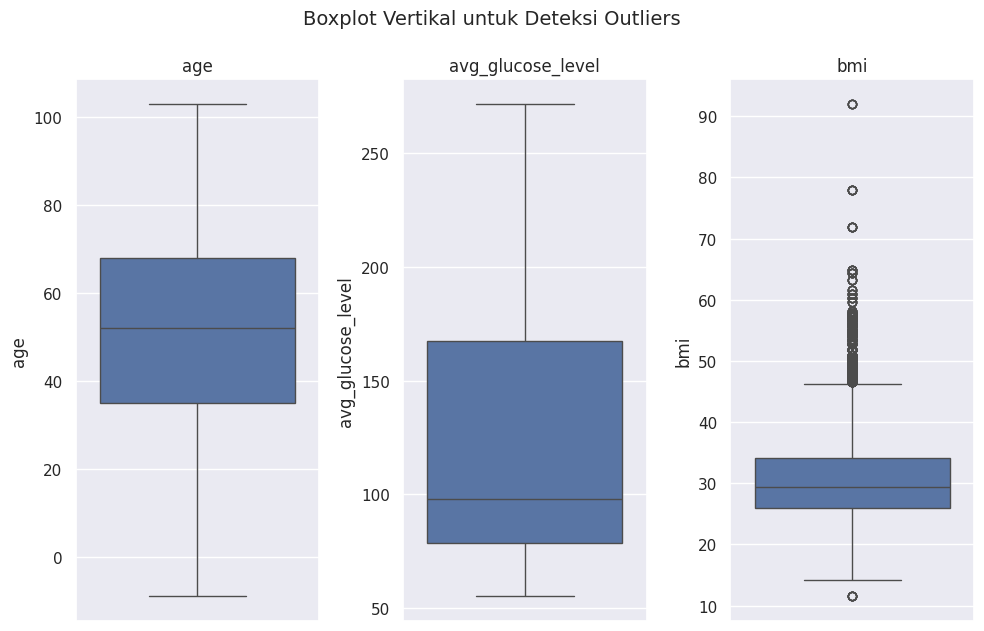

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = [ 'age',  'avg_glucose_level', 'bmi' ]

# Visualisasi Boxplot
plt.figure(figsize=(10, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(y=data[col])
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Boxplot Vertikal untuk Deteksi Outliers", fontsize=14, y=1.05)
plt.show()

**2. Interquartile Range (IQR)**

In [93]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

age: 0 outliers
avg_glucose_level: 0 outliers
bmi: 922 outliers


Berdasarkan output hasil analisis menggunakan Bloxpot dan Interquartile Range (IQR) di atas, diketahui bahwa:

Kolom bmi memiliki 922 outliers.

Hal ini menunjukkan adanya data yang jauh lebih tinggi atau lebih rendah dibandingkan sebagian besar data lainnya.

Metode yang sesuai untuk menangani outliers dalam dataset stroke ini adalah Winsorizing (mengganti outliers dengan batas IQR).

Alasannya:

1. Kolom 'bmi' berisi data numerik kontinu yang rentan terhadap nilai ekstrem (outliers).

2. Outliers pada kolom 'bmi' dapat memengaruhi model, terutama model berbasis jarak seperti KNN.

3. Winsorizing dapat membatasi nilai ekstrem ke dalam batas persentil tertentu tanpa menghapus data.

4. Dapat menjaga ukuran dan distribusi data tetap stabil.


**A. Winsorizing (Mengganti Outlier dengan Batas IQR)**

In [94]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

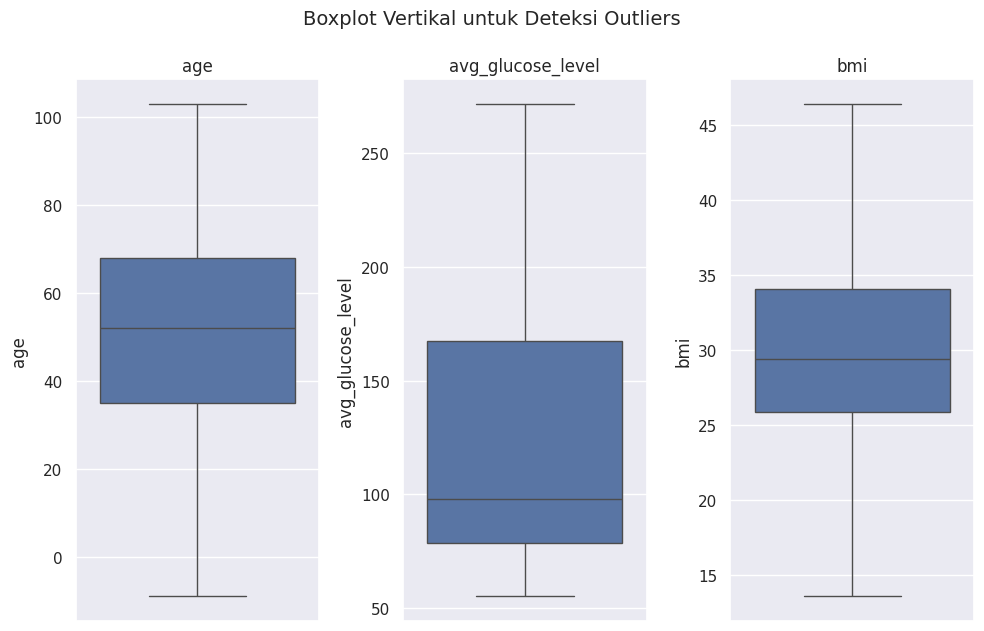

In [95]:
#cek boxplot lagi

num_cols = ['age',  'avg_glucose_level', 'bmi']

# Visualisasi Boxplot
plt.figure(figsize=(10, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(y=data[col])
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Boxplot Vertikal untuk Deteksi Outliers", fontsize=14, y=1.05)
plt.show()

In [96]:
#Cek Outlier lagi setelah ditangani
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

age: 0 outliers
avg_glucose_level: 0 outliers
bmi: 0 outliers


Dikarenakan tidak terdapat data kategorik dalam dataset stroke (data kategorik telah diubah menjadi angka 0 dan 1), maka proses encoding tidak perlu dilakukan.

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40910 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


3. Lakukan analisis klasifikasi menggunakan Naive Bayes dan KNN

   a. Jelaskan langkah-langkah pemodelannya

   b. Evaluasi model menggunakan confusion matrix dan akurasi

   c. Jika memungkinkan, visualisasikan hasilnya

   d. Bandingkan hasil klasifikasi antara Naïve Bayes dengan KNN

   Penyelesaian:


Langkah-langkah pemodelan analisis klasifikasi menggunakan Naive Bayes dan Dataset stroke ini adalah sebagai berikut:
1. Pemahaman dan persiapan data

   Sebelum memulai analisis klasifikasi,  seorang data analyst terlebih dahulu  harus memahami isi datanya. Misalnya dalam dataset stroke ini, akan memprediksi apakah seseorang mengalami stroke berdasarkan data seperti usia, jenis kelamin, tekanan darah, status merokok, dan lainnya. Berikut adalah tindakan yang terdapat dalam tahap ini:
   - Pisahkan data fitur (X) seperti:
    age, hypertension, heart_disease, avg_glucose_level, bmi, dll.

  - Tentukan target (y) yaitu kolom stroke (0 = tidak stroke, 1 = stroke)

  - Cek apakah ada data kosong (missing value), jika ada bersihkan terlebih dahulu
  - Cek apakah ada nilai kosong, jika ada dapat diatasi menggunakan metode yang sesuai

2. Membagi data menjadi dua bagian, yaitu Data latih (untuk melatih model) dan Data uji (untuk menguji akurasi model)

3. Melakukan analisis klasifikasi menggunakan Naive Bayes

   Naive Bayes merupakan metode pengklasifikasian berdasarkan probabilitas sederhana yang dirancang untuk dapat digunakan dengan asumsi antar variabel penjelas saling bebas (independen). Berikut adalah tindakan yang terdapat dalam tahap ini:
   - Jika datanya bersifat numerik, gunakan GaussianNB (karena asumsi distribusinya normal)
   - Lalu prediksi data uji
   - Mengevaluasi model menggunakan confusion matrix dan akurasi
   - Memvisualisasikan hasil

4. Melakukan analisis klasifikasi menggunakan K-Nearest Neighbors (KNN)

   K-Nearest Neighbors (KNN) merupakan algoritma klasifikasi berbasis instance-based learning yang tidak membangun model eksplisit.
   Berikut adalah tindakan yang terdapat dalam tahap ini:
   - Normalisasi data terlebih dahulu
   - Membuat model KNN (contohnya dengan k = 5)
   - Prediksi data uji
   - Mengevaluasi model menggunakan confusion matrix dan akurasi
   - Memvisualisasikan hasil

5. Membandingkan hasil klasifikasi antara Naive Bayes dengan KNN
   
   Menentukan model mana yang lebih akurat dan cocok digunakan untuk klasifikasi risiko stroke.


   


# **PERSIAPAN DATA UNTUK ANALISIS KLASIFIKASI MENGGUNAKAN NAIVE BAYES DAN KNN**

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [99]:
data.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


Setiap baris dalam dataset stroke ini mewakili satu pasien, dan kolom-kolomnya adalah atribut-atribut yang diamati pada pasien-pasien tersebut. Berikut adalah penjelasan dari setiap variabelnya:

1. Sex: Jenis kelamin pasien (Male=0, Female=1).
2. Age: Usia pasien dalam tahun.
3. Hypertension: Status hipertensi (1 jika pasien memiliki hipertensi, 0 jika tidak memiliki hipertensi).
4. Heart_Disease: Status penyakit jantung (1 jika pasien memiliki penyakit jantung, 0 jika tidak memiliki penyakit jantung).
5. Ever_Married: Status pernikahan pasien (Belum menikah = 0, sudah menikah = 1).
6. Work_Type: Jenis pekerjaan pasien (Private=1, Self-employed=2, Govt_job=3, Children=4, Never_worked=5).
7. Residence_Type: Tempat tinggal pasien (Urban=0 atau Rural=1).
8. Avg_glucose_level: Rata-rata kadar glukosa dalam darah pasien.
9. Bmi (Body Mass Index):  Indeks massa tubuh pasien, dihitung berdasarkan berat dan tinggi badan (kg/m^2).
10. Smoking_status: Status merokok pasien (formerly smoked=0, never smoked=1, smokes=2, atau Unknown=3).
11. Stroke: Variabel target atau label yang menunjukkan apakah pasien mengalami stroke atau tidak. Label ini bernilai 1 untuk kasus positif (pasien mengalami stroke) dan 0 untuk kasus negatif (pasien tidak mengalami stroke).

Dataset ini memberikan informasi penting tentang karakteristik klinis pasien dan dapat digunakan untuk memprediksi atau menganalisis faktor-faktor risiko yang terkait dengan penyakit stroke.

In [100]:
data.tail(15)

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
40895,0.0,65.0,0,0,1,3,0,102.21,36.3,0,0
40896,0.0,22.0,0,1,1,2,1,77.30,33.4,0,0
40897,0.0,54.0,0,0,0,1,0,97.97,24.5,0,0
40898,0.0,40.0,0,0,1,4,1,81.33,28.9,0,0
40899,1.0,27.0,0,0,1,4,1,196.61,23.0,0,0
40900,1.0,30.0,0,0,1,3,1,219.92,33.5,1,0
40901,1.0,19.0,0,0,1,2,0,79.16,34.8,1,0
40902,0.0,64.0,0,0,1,3,1,99.68,17.6,1,0
40903,1.0,30.0,0,0,1,3,1,79.55,21.1,1,0
40904,1.0,60.0,0,0,1,4,0,87.86,29.0,1,0


Dataset ini memiliki total pengamatan 40.910.

In [101]:
count_values = data['stroke'].value_counts()
count_values

,count
stroke,
1,20460
0,20450


In [102]:
# Menghitung rata-rata berdasarkan nilai 'stroke'
mean_by_stroke = data.groupby('stroke').mean()

# Menampilkan rata-rata untuk setiap variabel berdasarkan nilai 'stroke'
print(mean_by_stroke)


             sex        age  hypertension  heart_disease  ever_married  \
stroke                                                                   
0       0.610416  50.061222      0.108362       0.052958      0.751736   
1       0.500000  52.592669      0.319257       0.202444      0.890909   

        work_type  Residence_type  avg_glucose_level        bmi  \
stroke                                                            
0        3.440440        0.509046         106.792555  30.092499   
1        3.481818        0.520723         137.351777  30.460430   

        smoking_status  
stroke                  
0             0.454425  
1             0.522776  


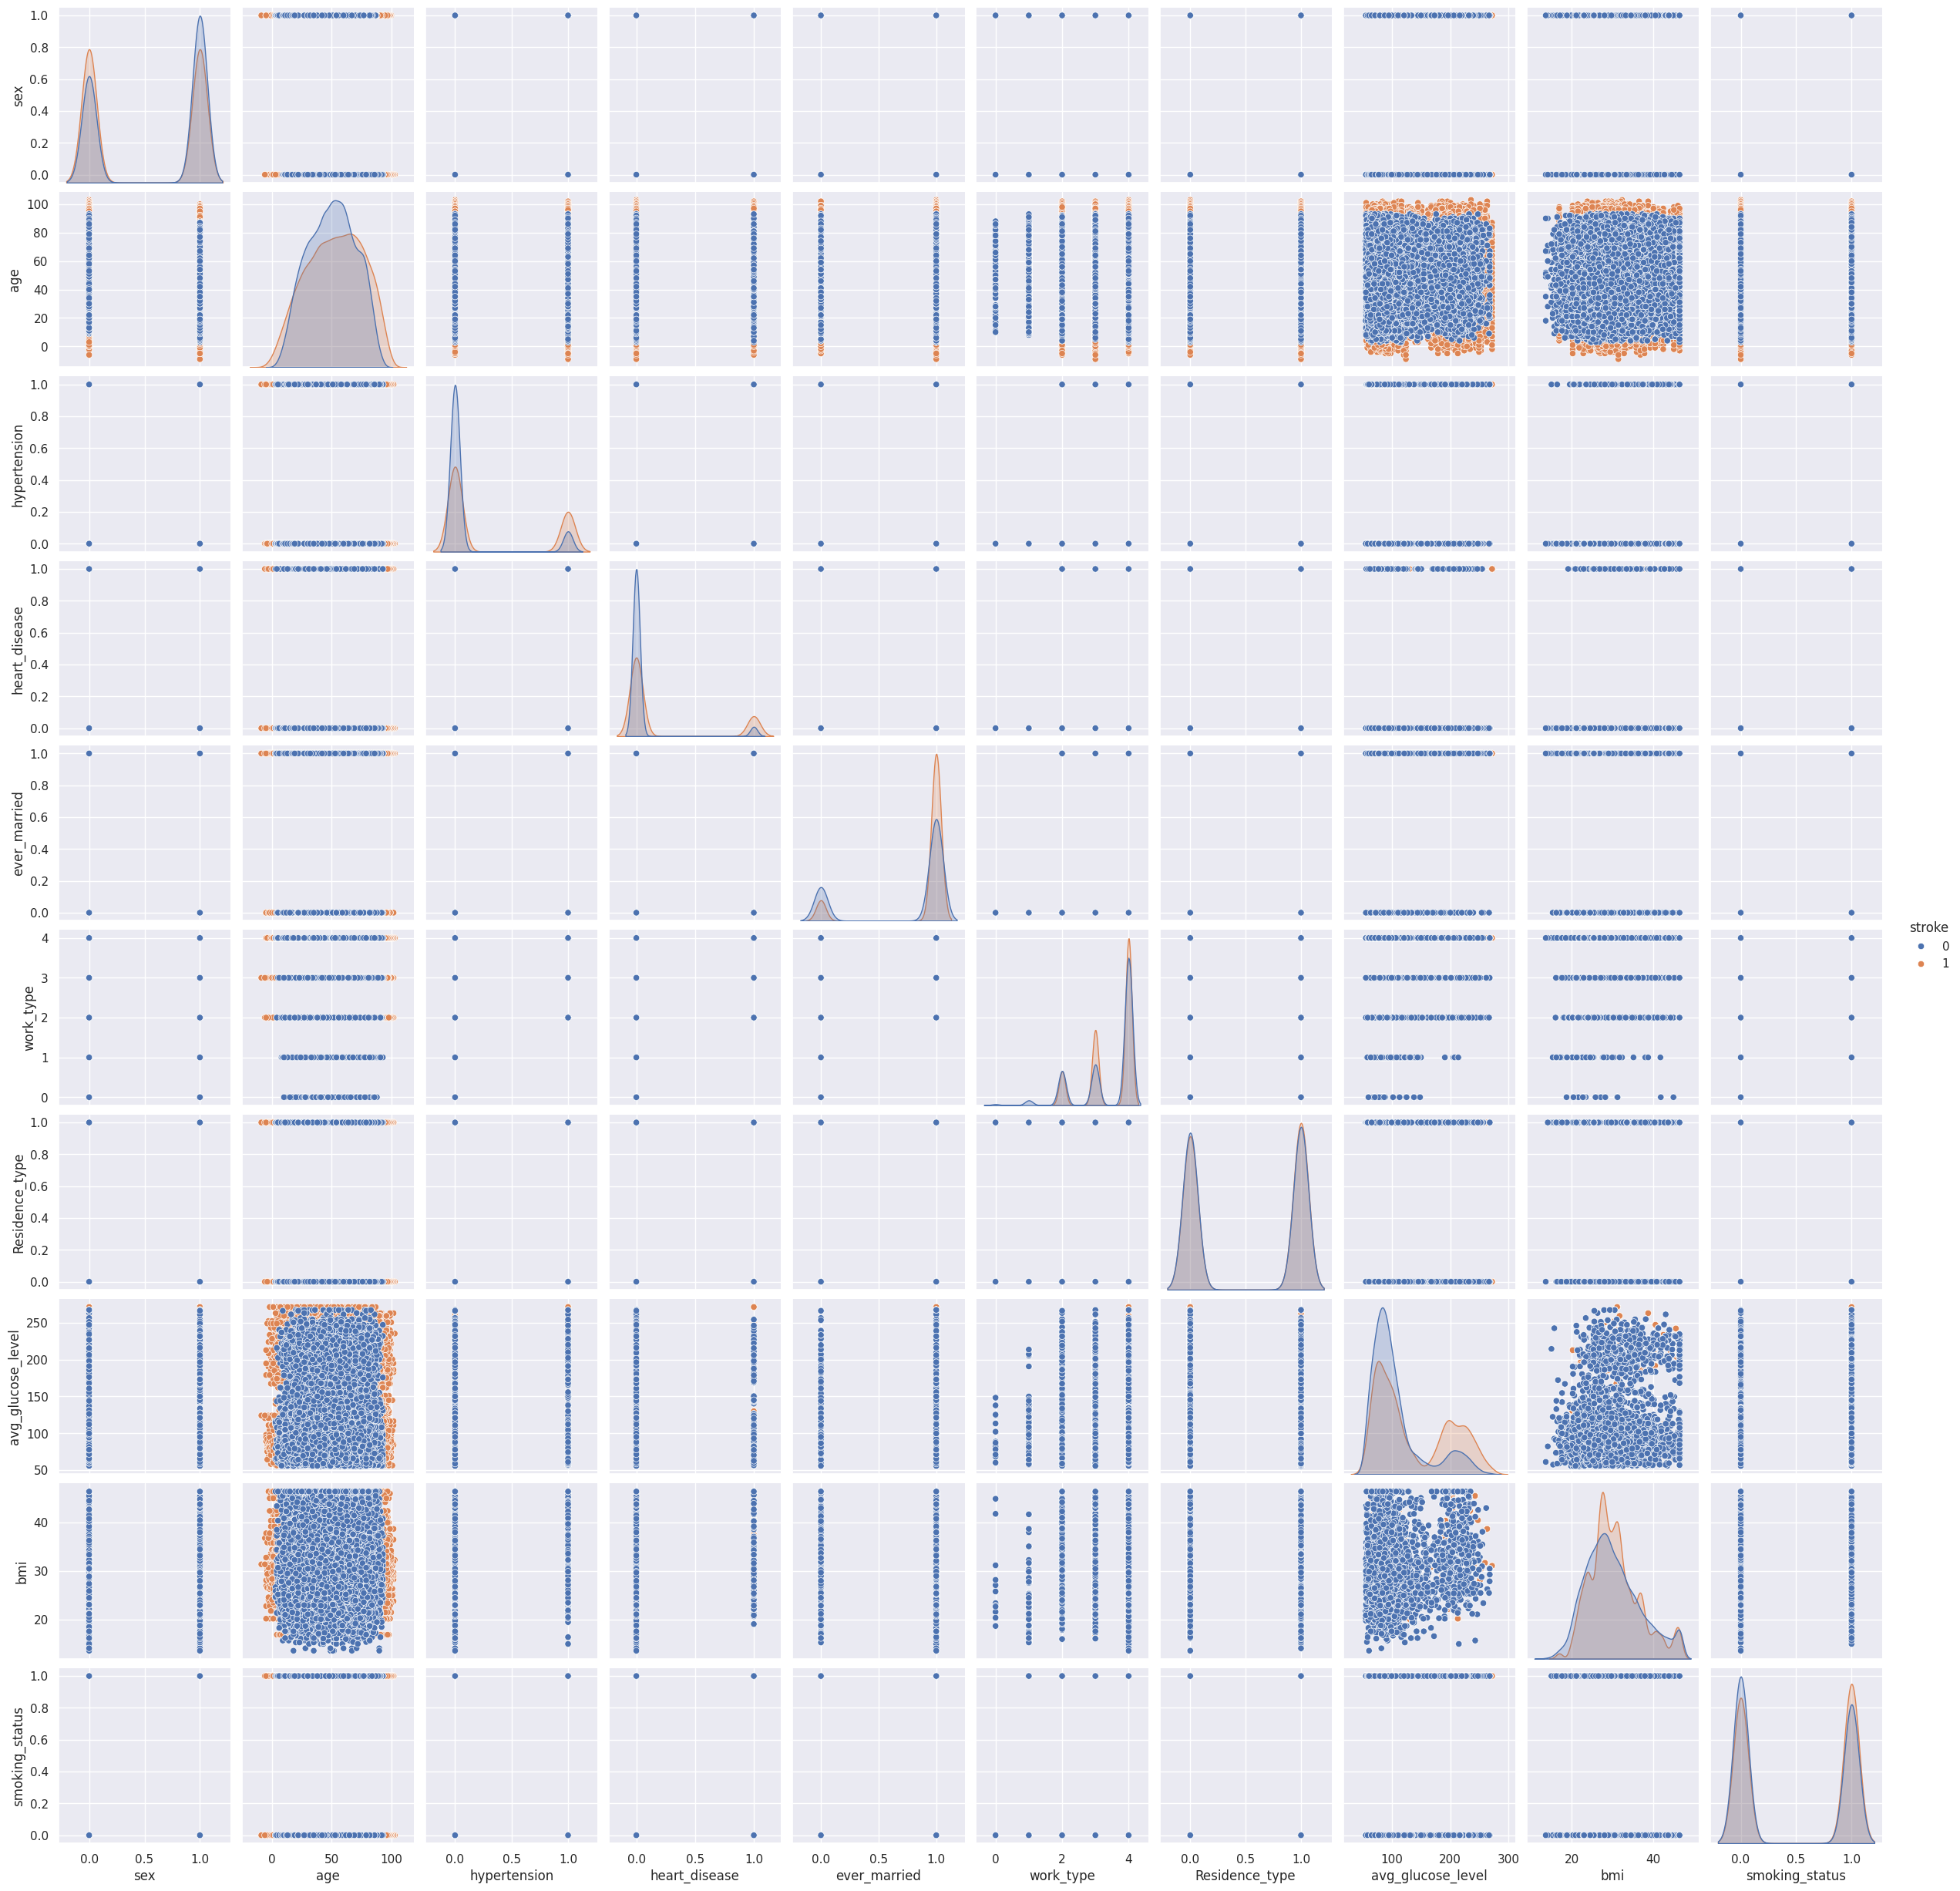

In [103]:
#visualisasi. warna dibedakan berdasarkan outcomenya apakah stroke atau tidak
sns.pairplot(data, vars=['sex', 'age', 'hypertension', 'heart_disease','ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'], hue='stroke')

Gambar di atas menggunakan kode sns.pairplot dari library Seaborn untuk membuat visualisasi hubungan antar pasangan variabel dari dataset stroke. Variabel-variabel yang dipilih untuk divisualisasikan adalah:
'sex', 'age', 'hypertension', 'heart_disease','ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', dikarenakan variabel tersebut berhubungan dengan kondisi kesehatan pasien.

sns.pairplot: Fungsi dari Seaborn yang menghasilkan grid scatter plots (plot titik-titik) untuk menunjukkan hubungan antara dua variabel:

a. stroke: Dataset yang digunakan untuk membuat pairplot.

b. vars: Parameter yang digunakan untuk memilih variabel-variabel numerik yang akan ditampilkan dalam grid.

c. hue='stroke': Kolom stroke digunakan sebagai pembeda warna, yaitu untuk membedakan apakah pasien mengalami stroke (1) atau tidak (0).

Dengan menggunakan pairplot dan pewarnaan berdasarkan nilai stroke, scatter plot akan menampilkan pola distribusi dan hubungan antar variabel numerik, serta bagaimana karakteristik pasien berbeda antara yang pernah terkena stroke dan yang tidak. Hal ini membantu dalam memahami tren dan potensi faktor risiko berdasarkan distribusi data.



In [106]:
import seaborn as sns
import pandas as pd


# Menghitung korelasi antara setiap variabel dengan 'stroke'
correlation_with_stroke = data.corr()['stroke'].sort_values(ascending=False)

# Menampilkan korelasi setiap variabel dengan 'stroke'
print(correlation_with_stroke)


stroke               1.000000
avg_glucose_level    0.265452
hypertension         0.257182
heart_disease        0.223930
ever_married         0.181656
smoking_status       0.068368
age                  0.058534
bmi                  0.028732
work_type            0.026494
Residence_type       0.011682
sex                 -0.111095
Name: stroke, dtype: float64


Output di atas menunjukkan bahwa nilai korelasi antara variabel target 'stroke' dengan setiap variabel lain dalam dataset. Nilai korelasi yang diperoleh berada pada rentang antara -1 hingga 1.

1. Korelasi Positif: Nilai korelasi mendekati 1 menunjukkan adanya korelasi positif, artinya ketika suatu variabel meningkat, kemungkinan pasien mengalami stroke juga meningkat.
    - avg_glucose_level (0.265) menunjukkan adanya hubungan positif yang cukup terlihat. Hal ini menunjukkan bahwa semakin tinggi kadar glukosa rata-rata, semakin besar kemungkinan seseorang terkena stroke.  
    - hypertension (0.257) dan heart_disease (0.224) juga menunjukkan korelasi yang positif.
    - ever_married (0.182) menunjukkan hubungan positif ringan, hal ini biasanya terkait dengan usia atau gaya hidup pasien.

2. Korelasi Negatif: Pada variabel sex (-0.111) menunjukkan korelasi negatif ringan. Hal ini menunjukkan bahwa jenis kelamin memiliki sedikit hubungan terbalik terhadap kemungkinan stroke (misalnya, satu jenis kelamin mungkin sedikit lebih rentan dari yang lain), namun tidak terlalu signifikan secara statistik.

3. Korelasi Dekat dengan 0: Nilai mendekati 0 menunjukkan korelasi yang lemah atau hampir tidak ada hubungan linear.

    - smoking_status (0.068), age (0.059), bmi (0.029), work_type (0.026), dan Residence_type (0.012) memiliki korelasi sangat lemah dengan stroke, hal ini menunjukkan bahwa hubungan liniernya tidak signifikan.

Berdasarkan penjelasan di atas, dapat disimpulkan bahwa nilai korelasi ini memberikan gambaran awal tentang variabel-variabel yang mungkin berpengaruh terhadap risiko stroke. Variabel avg_glucose_level, hypertension, dan heart_disease adalah tiga variabel yang memiliki hubungan paling kuat dengan kemungkinan terkena stroke, sehingga penting untuk diperhatikan dalam proses analisis lebih lanjut.

**Memisahkan Variabel X dan Y**

Dalam analisis klasifikasi menggunakan data stroke, pemisahan data menjadi data X dan y merupakan langkah penting dalam tahap persiapan data. Langkah ini bertujuan untuk memisahkan antara variabel independen (fitur) dengan variabel dependen (label) yang ingin diprediksi.

Data X merupakan kumpulan fitur atau atribut yang digunakan oleh model untuk mempelajari pola-pola yang berhubungan dengan kejadian stroke.

Dalam dataset stroke, fitur-fitur tersebut dapat mencakup variabel seperti gender (jenis kelamin), age (usia), hypertension (riwayat hipertensi), heart_disease (riwayat penyakit jantung), ever_married (status pernah menikah), work_type (jenis pekerjaan), Residence_type (lokasi tempat tinggal), avg_glucose_level (rata-rata kadar glukosa), bmi (indeks massa tubuh), dan smoking_status (status merokok).

Sementara itu, data y merupakan variabel target yang ingin diprediksi oleh model, yaitu kolom stroke yang menunjukkan apakah seorang individu mengalami stroke (1) atau tidak (0). Pemisahan ini penting karena data X digunakan untuk melatih model agar dapat mengenali pola-pola yang relevan, sedangkan data y digunakan untuk mengevaluasi seberapa baik model dalam melakukan prediksi terhadap kejadian stroke berdasarkan fitur-fitur yang tersedia.

In [107]:
#memisahkan data menjadi variabel x dan y
X=data.drop(['stroke'], axis=1)
y=data['stroke']

**Membagi Data menjadi Data Training dan Data Testing**

**Data training** adalah bagian dari dataset yang digunakan untuk melatih model dalam mengenali pola hubungan antara fitur (variabel independen) dan target (variabel dependen). Model belajar dari data ini untuk membuat prediksi yang akurat.

Sementara itu, **data testing** digunakan untuk menguji kinerja model terhadap data baru yang belum pernah dilihat sebelumnya, sehingga dapat mengukur kemampuan generalisasi model.

Pemisahan data training dan testing merupakan langkah penting. Pemisahan ini umumnya digunakan pada rasio **70:30** atau **80:20**, di mana 70%–80% data digunakan untuk training dan sisanya untuk testing. Pada dataset stroke ini, digunakan pemisahan 80:20.

Jika dataset sangat besar, pembagian **90:10** atau **95:5** juga bisa dipertimbangkan, dengan alasan data testing tetap cukup untuk evaluasi yang akurat.

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.model_selection import train_test_split: Ini adalah baris yang mengimpor fungsi train_test_split dari pustaka Scikit-Learn.

Fungsi ini digunakan untuk membagi dataset stroke menjadi dua bagian, yaitu data untuk pelatihan (training) dan data untuk pengujian (testing) secara mudah dan efisien.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0): Ini adalah pemanggilan fungsi train_test_split. Parameter yang digunakan adalah sebagai berikut:

   - X: Variabel yang berisi fitur-fitur dari dataset stroke, seperti age, hypertension, heart_disease, avg_glucose_level, bmi, dll. (ingat: huruf X besar untuk fitur).

   - y: Variabel target yaitu kolom stroke yang menunjukkan apakah seseorang mengalami stroke atau tidak (ingat: huruf y kecil untuk label).

   - test_size=0.2: Menentukan bahwa 20% dari seluruh data akan digunakan sebagai data testing, dan 80% sisanya akan digunakan sebagai data training.

   - random_state=0: Menentukan seed untuk pembagian data secara acak agar hasil pembagian bisa konsisten setiap kali dijalankan.

Dari 4 fungsi di atas menghasilkan empat variabel sebagai berikut:

1. X_train: Data training untuk fitur-fitur (misalnya: age, avg_glucose_level, smoking_status, dan lainnya.).

2. X_test: Data testing untuk fitur-fitur.

3. y_train: Label stroke untuk data training.

4. y_test: Label stroke untuk data testing.

Proses ini penting untuk mengetahui seberapa baik model memprediksi risiko stroke pada data baru yang belum pernah dilihat sebelumnya, sehingga model tidak hanya "menghafal" data latihan, tapi mampu menggeneralisasi pola yang ditemukan.

In [109]:
from sklearn.preprocessing import MinMaxScaler

X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

print(X_train)

[[1.         0.51351351 0.         ... 0.65626443 0.63719512 1.        ]
 [1.         0.21621622 1.         ... 0.56522943 0.50304878 0.        ]
 [0.         0.36936937 0.         ... 0.09699012 0.49695122 1.        ]
 ...
 [0.         0.63963964 0.         ... 0.15626443 0.50609756 0.        ]
 [1.         0.73873874 0.         ... 0.04307082 0.39939024 0.        ]
 [1.         0.47747748 1.         ... 0.26724218 0.31707317 0.        ]]


MinMaxScaler adalah metode normalisasi yang mengubah nilai fitur ke dalam rentang 0 sampai 1. Hal ini penting agar fitur-fitur numerik seperti age, avg_glucose_level, dan bmi berada dalam skala yang sebanding.

Penjelasan kode di atas:

  - scaler.fit_transform(X_train) digunakan untuk menghitung nilai minimum dan maksimum setiap fitur pada data training, lalu melakukan transformasi (normalisasi) berdasarkan nilai tersebut.

  - scaler.transform(X_test) digunakan untuk melakukan transformasi data testing dengan parameter minimum dan maksimum yang telah dihitung dari data training. Ini penting untuk mencegah kebocoran data testing ke proses pelatihan.

# **ANALISIS KLASIFIKASI MENGGUNAKAN NAIVE BAYES**

In [110]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [111]:
# fit train set pake Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [112]:
# Latih dan prediksi model Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [113]:
# compute the accuracy of train set
nb.score(X_train, y_train)

0.6722072842825715

In [114]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [115]:
#import accuracy_score function
from sklearn.metrics import accuracy_score

for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 0.6837


In [116]:
acc_nb = accuracy_score(y_test, y_pred_nb)
print("NB accuracy = ", round(acc_nb, 2))

NB accuracy =  0.68


In [118]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Prediksi dan evaluasi untuk Naive Bayes
y_pred_nb = nb.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Confusion Matrix:
 [[3343  774]
 [1814 2251]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.81      0.72      4117
           1       0.74      0.55      0.63      4065

    accuracy                           0.68      8182
   macro avg       0.70      0.68      0.68      8182
weighted avg       0.70      0.68      0.68      8182

Accuracy: 0.6836959178684918


In [119]:
from sklearn.metrics import classification_report

# Evaluasi Hasil Naive Bayes
acc_nb = accuracy_score(y_test, y_pred_nb)

print("\n=== Naive Bayes ===")
print("Akurasi:", acc_nb)
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


=== Naive Bayes ===
Akurasi: 0.6836959178684918
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.81      0.72      4117
           1       0.74      0.55      0.63      4065

    accuracy                           0.68      8182
   macro avg       0.70      0.68      0.68      8182
weighted avg       0.70      0.68      0.68      8182



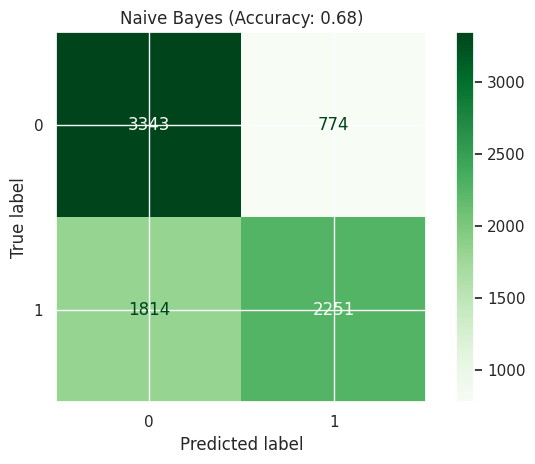

In [120]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Visualisasi Confusion Matrix untuk Naive Bayes
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb, cmap='Greens')
plt.title(f'Naive Bayes (Accuracy: {acc_nb:.2f})')
plt.tight_layout()
plt.show()

# **ANALISIS KLASIFIKASI MENGGUNAKAN K-NEAREST NEIGHBORS (KNN)**

In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [126]:
# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [128]:
# Split data untuk train dan test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [129]:
# Melatih model KNN dan membuat prediksi
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [130]:
from sklearn.metrics import accuracy_score

# Akurasi untuk model KNN
print('KNN accuracy = {:.4f}'.format(accuracy_score(y_test, y_pred_knn)))

KNN accuracy = 0.8832


In [131]:
acc_knn = accuracy_score(y_test, y_pred_knn)
print("KNN accuracy = ", round(acc_knn, 2))

KNN accuracy =  0.88


In [132]:
# Prediksi dan evaluasi
y_pred = knn.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[3150  872]
 [  84 4076]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.78      0.87      4022
           1       0.82      0.98      0.90      4160

    accuracy                           0.88      8182
   macro avg       0.90      0.88      0.88      8182
weighted avg       0.90      0.88      0.88      8182

Accuracy: 0.8831581520410657


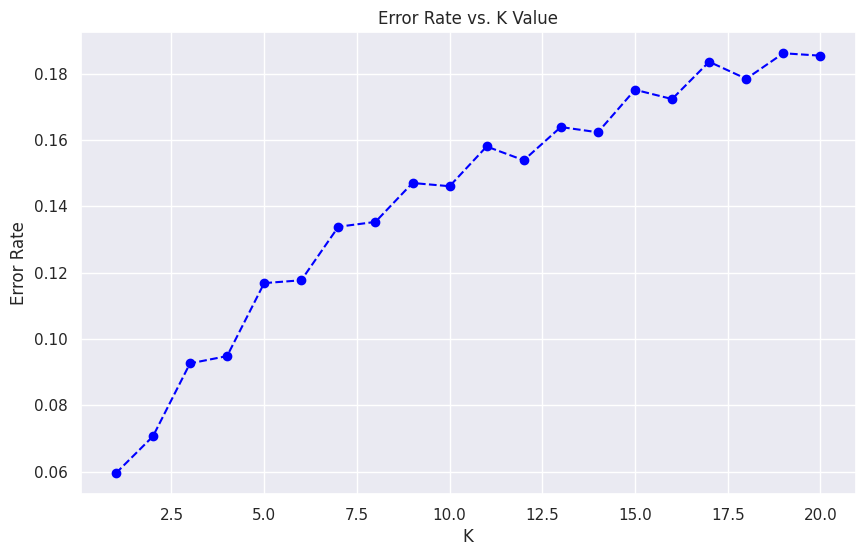

In [133]:
# Visualisasi error rate untuk nilai K berbeda
error_rate = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_rate.append(1 - accuracy_score(y_test, pred_k))

plt.figure(figsize=(10,6))
plt.plot(range(1,21), error_rate, marker='o', linestyle='dashed', color='blue')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [134]:
# Evaluasi Hasil KNN
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_nb = accuracy_score(y_test, y_pred_nb)

print("=== KNN ===")
print("Akurasi:", acc_knn)
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


=== KNN ===
Akurasi: 0.8831581520410657
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.78      0.87      4022
           1       0.82      0.98      0.90      4160

    accuracy                           0.88      8182
   macro avg       0.90      0.88      0.88      8182
weighted avg       0.90      0.88      0.88      8182



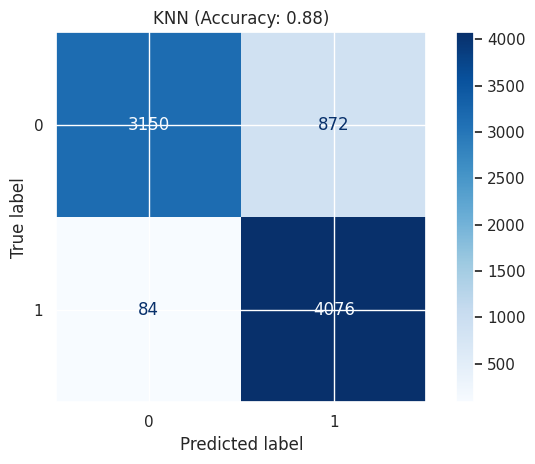

In [135]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Visualisasi Confusion Matrix untuk KNN
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, cmap='Blues')
plt.title(f'KNN (Accuracy: {acc_knn:.2f})')
plt.tight_layout()
plt.show()


## **PERBANDINGAN HASIL KLASIFIKASI ANTARA NAIVE BAYES DENGAN K-NEAREST NEIGHBORS (KNN)**

Berdasarkan hasil klasifikasi di atas, diperoleh poin-poin penting sebagai berikut:

- Tingkat akurasi

  - Naive Bayes: 68%
  - KNN: 88%
- True Positive & False Negative:

  - KNN berhasil memprediksi lebih banyak kelas 1 dengan benar (TP = 4076) dan kesalahan sangat kecil (FN = 84).

  - Naïve Bayes memiliki banyak kesalahan dalam memprediksi kelas 1 (FN = 1814).

- Kelebihan Model
  - Naïve Bayes: Cepat dan cocok untuk data yang berjumlah besar, tetapi mengasumsikan fitur independen.

  - KNN: Lebih akurat dan fleksibel sehingga cocok untuk data yang tidak linear.

Kesimpulan:

 Dari perhitungan di atas diketahui bahwa model klasifikasi K-Nearest Neighbors (KNN) terbukti memberikan performa yang lebih baik dibandingkan dengan model klasifikasi Naïve Bayes. Akurasi model KNN mencapai 88%, jauh lebih tinggi dibandingkan dengan Naïve Bayes yang hanya mencapai 68%. Dalam model confusion matrix, KNN menunjukkan kemampuan klasifikasi yang sangat baik terhadap kelas positif (label 1), dengan True Positive (TP) sebanyak 4076 dan False Negative (FN) hanya 84, sedangkan Naïve Bayes memiliki FN yang tinggi (1814) dan TP yang lebih rendah (2251). Hal ini menunjukkan bahwa Naïve Bayes cenderung sering salah dalam memprediksi kelas 1. Keunggulan KNN ini disebabkan karena sifatnya yang non-parametrik dan dapat menyesuaikan dengan distribusi data secara lokal, sedangkan Naïve Bayes bergantung pada asumsi independensi antar fitur yang sering tidak terpenuhi dalam data dunia nyata. Oleh karena itu, untuk dataset stroke ini, klasifikasi analisis KNN lebih baik dan akurat dibandingkan analisis klasifikasi menggunakan Naïve Bayes.